<div style="background: #6883bc; color: white; padding: 10px; font-size: 16pt; line-height: 1.5">
<b><center>Анализ результатов A/B-тестирования для увеличения выручки интернет-магазина<b>
    
</div>

## Оглавление

[Описание задачи](#description)  
[Импорты и настройки](#imports)

[1. Приоретизация гипотез](#hypothesis)     
[1.1 Фреймворк ICE](#ice)     
[1.2 Фреймворк RICE](#rice)         
[Вывод по приоритету гипотез](#hypothesis_conclusion)

[2. Анализ A/B-теста](#a_b_test)    
[2.1 Изучение общей информации](#start) 
* [2.1.1 Открытие файла с данными, первый взгляд на данные](#open)
* [2.1.2 Обзор уникальных значений](#unique)      
 - [2.1.2.1 Уникальные значения в таблице orders](#unique_orders)
 - [2.1.2.2 Уникальные значения в таблице visitors](#unique_visitors)    

[Вывод по п. 2.1](#start_conclusion)

[2.2 Анализ данных А/В тестирование](#analysis)
* [2.2.1 График кумулятивной выручки по группам](#cum_revenue)
* [2.2.2 График кумулятивного среднего чека по группам](#cum_avg_check)
* [2.2.3 График относительного изменения кумулятивного среднего чека группы B к группе A](#cum_avg_check_B_A)
* [2.2.4 График кумулятивной конверсии по группам](#cum_conversion)
* [2.2.5 График относительного изменения кумулятивной конверсии группы B к группе A](#cum_conversion_B_A)
* [2.2.6 Точечный график количества заказов по пользователям](#scatter_orders_users)
* [2.2.7 Границы для определения аномальных пользователей](#anomals_users)
* [2.2.8 Точечный график стоимостей заказов](#scatter_orders)
* [2.2.9 Границы для определения аномальных по стоимости заказов](#anomals_orders)
* [2.2.10 Статистическая значимость различий в конверсии между группами по «сырым» данным](#row_conversion)
* [2.2.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#row_avg_check)
* [2.2.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным](#clean_conversion)
* [2.2.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#clean_avg_check)
* [2.2.14 Принятие решения по результатам A/B теста](#results_a_b)     

[Вывод по п. 2.2](#analysis_conclusion)

[Общий вывод](#total_conclusion)

<a id='description'></a>
## Описание задачи

Отделом маркетинга подготовлен список гипотез для увеличения выручки интернет-магазина.

Цель - проанализровать результаты A/B-теста и сформулировать предложения для увеличения выручки интернет-магазина.

Задачи:
1. Приоритизировать гипотезы
2. Запустить A/B-тест
3. Получить результаты A/B-теста
4. Принять решения по результатам теста

<a id='imports'></a>
## Импорты и настройки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', -1)

In [3]:
sns.set(style="ticks")

In [4]:
def first_look(df):
    display(df.info())
    display(df.head(5))
    display(df.describe())
    display('Доля пустых строк:', df.isna().mean())
    display('Количество дублирующихся строк:', df.duplicated().sum())

<a id='hypothesis'></a>
## 1. Приоретизация гипотез

In [5]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [6]:
first_look(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


'Доля пустых строк:'

Hypothesis   0.00
Reach        0.00
Impact       0.00
Confidence   0.00
Efforts      0.00
dtype: float64

'Количество дублирующихся строк:'

0

In [7]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<a id='ice'></a>
### 1.1 Фреймворк ICE

In [8]:
hypothesis['ice'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [9]:
hypothesis[['Hypothesis', 'ice']].sort_values('ice', ascending=False)

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<a id='rice'></a>
### 1.2 Фреймворк RICE

In [10]:
hypothesis['rice'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [11]:
hypothesis[['Hypothesis', 'rice']].sort_values('rice', ascending=False)

,Hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


<a id='hypothesis_conclusion'></a>
## Вывод по приоритету гипотез

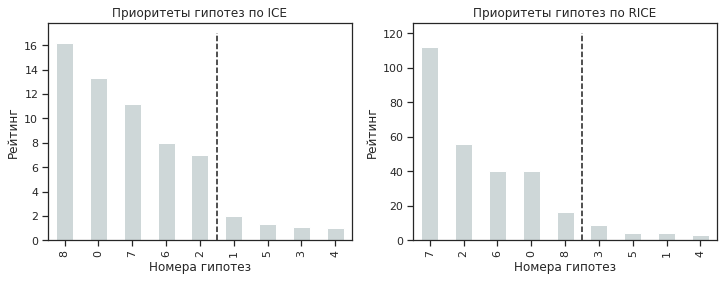

In [12]:
fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(1, 2, 1)
hypothesis['ice'].sort_values(ascending=False).plot(kind='bar', color='#ced7d8')
plt.vlines(4.5, 0, 17, linestyles='dashed')
plt.title('Приоритеты гипотез по ICE')
plt.xlabel('Номера гипотез')
plt.ylabel('Рейтинг')
ax2 = plt.subplot(1, 2, 2)
hypothesis['rice'].sort_values(ascending=False).plot(kind='bar', color='#ced7d8')
plt.vlines(4.5, 0, 120, linestyles='dashed')
plt.title('Приоритеты гипотез по RICE')
plt.xlabel('Номера гипотез')
plt.ylabel('Рейтинг')
plt.show()

In [13]:
hypothesis[['ice' , 'rice']].style.bar(color='#ced7d8')

,ice,rice
0,13.3333,40
1,2,4
2,7,56
3,1.125,9
4,1,3
5,1.33333,4
6,8,40
7,11.2,112
8,16.2,16.2


Гипотезы, попавшие в топ-5 по каждому из фреймворков, идентичны (номера 0, 2, 6, 7, 8). Именно они и будут наиболее приоритетными.

Однако лидерующая гипотеза по фреймворку ICE (№8 'Запустить акцию, дающую скидку на товар в день рождения') заняла лишь 5 место при приоретизации с помощью фреймворка RICE. Это произошло, т.к. у данной гипотезы самый низкий охват пользователей, которых затронет изменение (на уровне 1). 

Согласно результатам от применения фреймворка RICE, самая приоритетная гипотеза №7 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. У данной гипотезы самый высокий охват пользователей, которых затронет изменение (на уровне 10), а при применении фреймворка ICE без учета параметра REACH эта гипотеза заняла лишь 3 место.

<a id='a_b_test'></a>
## 2. Анализ A/B-теста

<a id='start'></a>
### 2.1 Изучение общей информации

<a id='open'></a>
#### 2.1.1 Открытие файла с данными, первый взгляд на данные

In [14]:
orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
first_look(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


'Доля пустых строк:'

transactionId   0.00
visitorId       0.00
date            0.00
revenue         0.00
group           0.00
dtype: float64

'Количество дублирующихся строк:'

0

In [15]:
visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
first_look(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


'Доля пустых строк:'

date       0.00
group      0.00
visitors   0.00
dtype: float64

'Количество дублирующихся строк:'

0

Полученные данные чистые, пропусков и дубликатов не выявлено.

<a id='unique'></a>
#### 2.1.3 Обзор уникальных значений

<a id='unique_orders'></a>
#### 2.1.3.1 Уникальные значения в таблице orders

In [16]:
print('Заказы содержат данные с {:%Y-%m-%d} до {:%Y-%m-%d}'.
      format(orders['date'].min(), orders['date'].max()))

Заказы содержат данные с 2019-08-01 до 2019-08-31


In [17]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Доля заказов в группе В составляет 53% от общего числа, в группе А соответственно 47%

In [18]:
orders['visitorId'].nunique()

1031

In [19]:
orders['transactionId'].count()

1197

In [20]:
print('В среднем на 1 пользователя приходится {:.2f} заказов'.
      format(orders['transactionId'].count() / orders['visitorId'].nunique()))

В среднем на 1 пользователя приходится 1.16 заказов


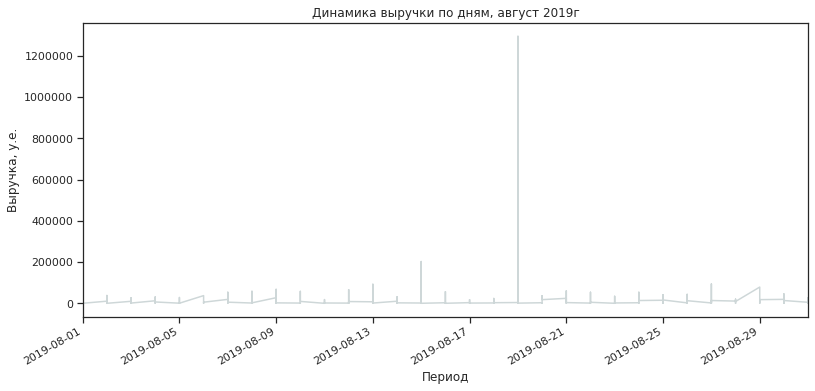

In [21]:
fig, ax = plt.subplots()
orders[['date', 'revenue']].plot(x='date', y='revenue', figsize=(13,6), color='#ced7d8', ax=ax)
ax.get_legend().remove()
plt.title('Динамика выручки по дням, август 2019г')
plt.xlabel('Период')
plt.ylabel('Выручка, у.е.')
plt.show()

Видим пиковый заказ в районе 19 августа.

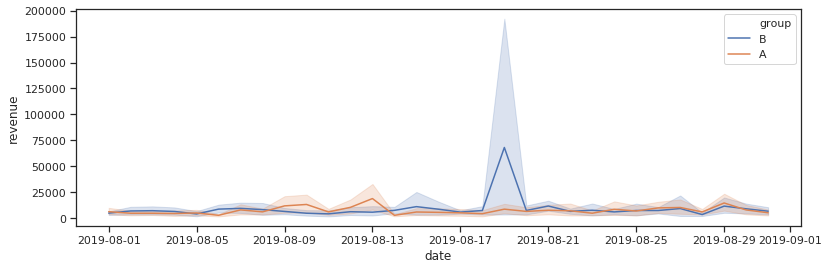

In [22]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=orders, x='date', y='revenue', hue='group')
plt.show()

Пиковый заказ был совершен в группе В

In [23]:
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'revenue' : 'sum', 'transactionId' : pd.Series.nunique})
orders_by_users.columns = ['userId', 'sum_revenue', 'count_orders']
orders_by_users.head()

,userId,sum_revenue,count_orders
0,5114589,570,1
1,6958315,1490,1
2,8300375,12300,2
3,11685486,6201,1
4,39475350,3990,1


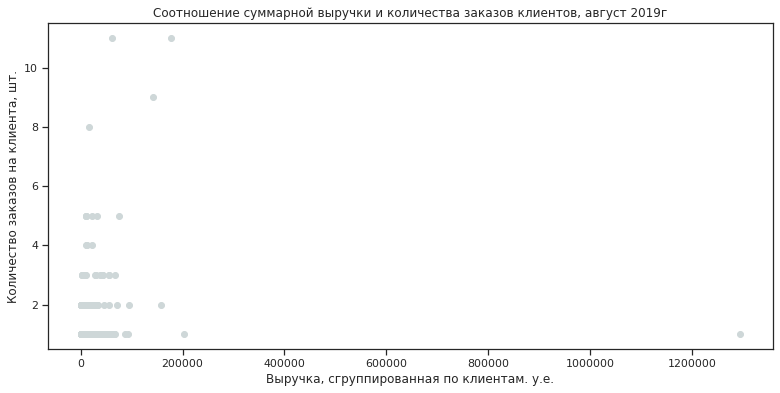

In [24]:
fig, ax = plt.subplots(figsize=(13,6))
plt.scatter(orders_by_users['sum_revenue'], orders_by_users['count_orders'], color='#ced7d8')
plt.title('Соотношение суммарной выручки и количества заказов клиентов, август 2019г')
plt.xlabel('Выручка, сгруппированная по клиентам. у.е.')
plt.ylabel('Количество заказов на клиента, шт.')
plt.show()

In [25]:
orders_by_users['mean_revenue'] = orders_by_users['sum_revenue'] / orders_by_users['count_orders']

In [26]:
orders_by_users.describe()

,userId,sum_revenue,count_orders,mean_revenue
count,1031.00,1031.00,1031.00,1031.00
mean,2130713285.94,9692.11,1.16,8406.27
std,1228157182.15,42984.48,0.72,41877.13
min,5114589.00,50.00,1.00,50.00
25%,1048013147.00,1290.00,1.00,1271.50
50%,2147998719.00,3250.00,1.00,2990.00
75%,3154896968.50,9448.00,1.00,8340.00
max,4283872382.00,1294500.00,11.00,1294500.00


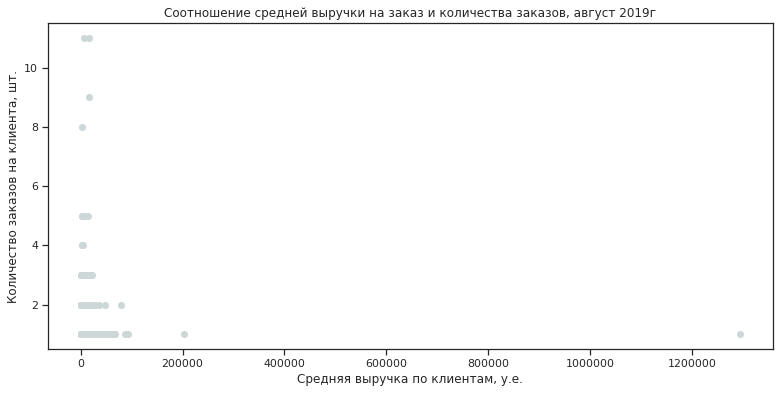

In [27]:
fig, ax = plt.subplots(figsize=(13,6))
plt.scatter(orders_by_users['mean_revenue'], orders_by_users['count_orders'], color='#ced7d8')
plt.title('Соотношение средней выручки на заказ и количества заказов, август 2019г')
plt.xlabel('Средняя выручка по клиентам, у.е.')
plt.ylabel('Количество заказов на клиента, шт.')
plt.show()

<a id='unique_visitors'></a>
#### 2.1.3.2 Уникальные значения в таблице visitors

In [28]:
print('Таблица по пользоваетлям содержит данные с {:%Y-%m-%d} до {:%Y-%m-%d}'.
      format(visitors['date'].min(), visitors['date'].max()))

Таблица по пользоваетлям содержит данные с 2019-08-01 до 2019-08-31


In [29]:
visitors.groupby('group')['visitors'].mean()

group
A   604.39
B   610.19
Name: visitors, dtype: float64

В среднем размер групп пользователей по визитам сопоставим

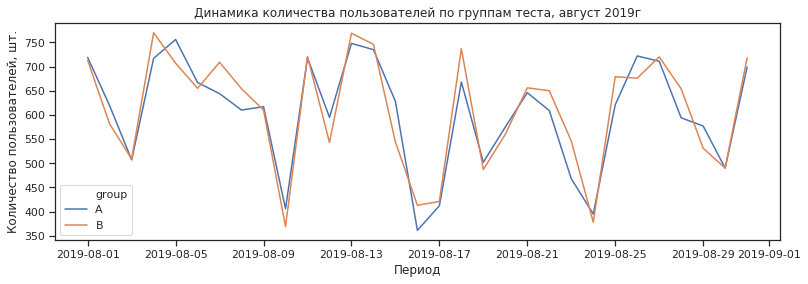

In [30]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=visitors, x='date', y='visitors', hue='group')
plt.title('Динамика количества пользователей по группам теста, август 2019г')
plt.xlabel('Период')
plt.ylabel('Количество пользователей, шт.')
plt.show()

Аномалий в количестве пользователей по дням теста в разных группах не выялвено, данные меняются приблизительно со схожей тенденцией

Проверим уникальность пользователей в каждой из групп теста

In [31]:
len(set(orders.query('group == "A"')['visitorId'].unique()).
    intersection(set(orders.query('group == "B"')['visitorId'].unique())))

58

In [32]:
len(set(orders.query('group == "A"')['transactionId'].unique()).
    intersection(set(orders.query('group == "B"')['transactionId'].unique())))

0

<a id='start_conclusion'></a>
### Вывод по шагу 2.1

Получены чистые данные в 2 таблицах: по заказам и по пользователям в рамках теста за период с 2019-08-01 до 2019-08-31.

Беглый анализ выручки по заказам позволил увидеть значительный пик в районе 19 августа, заказ был совершен клиентом, принадлежащих группе В.

Заметим, что разметка пользователей была сделана некорректно - 58 пользователей (5,6% от всех уникальных пользователей) попали в обе группы. О чем это может говорить? Что не был проведен АА-тест и качество нашего теста может быть невысоким, а его результаты будут искажены в любом случае - и в случае анализа всех пользоватлей, и в случае удаления информации по пользователям, попавшим в обе группы. Поскольку заказы в каждой из групп являются уникальными, не будем удалять выявленных пользователей с некорректной разметкой.

<a id='analysis'></a>
### 2.2 Анализ данных А/В тестирование

Для проведения анализа результатов А/В теста добавим необходимые расчетные данные и таблицы

In [33]:
datesGroups = orders[['date','group']].drop_duplicates()

In [34]:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

In [35]:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

In [36]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

In [37]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


In [38]:
cumulativeData['avg_check'] = cumulativeData['revenue'] / cumulativeData['orders']

In [39]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

<a id='cum_revenue'></a>
### 2.2.1 График кумулятивной выручки по группам

Проанализируем, как меняется выручка по группам, рассчитанная накопительно по дням в течение теста

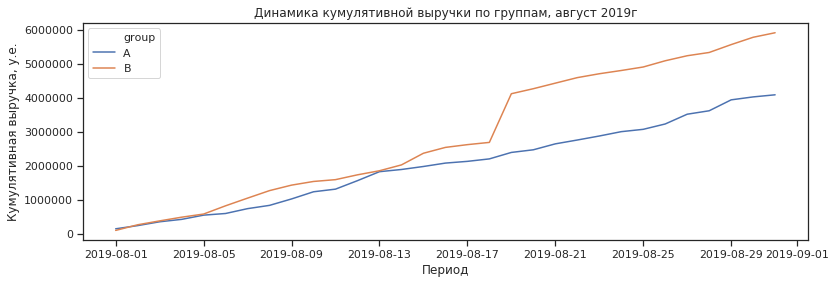

In [40]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group')
plt.title('Динамика кумулятивной выручки по группам, август 2019г')
plt.xlabel('Период')
plt.ylabel('Кумулятивная выручка, у.е.')
plt.show()

Выручка в обеих группах имеет восходящую тендению на протяжении всего теста. Кумулятивная выручка в группе В выше почти с самого начала теста, 19-20 августа заметен резкий рост и в дальнейшем полученный гэп между выручками сохраняется до конца теста. Как мы видели ранее на предварительном анализе, в указанные даты по группе B был очень дорогой заказ, который будет являться выбросом среди остальных, который, скорее всего, и имел влияние на резкий рост.

<a id='cum_avg_check'></a>
### 2.2.2 График кумулятивного среднего чека по группам

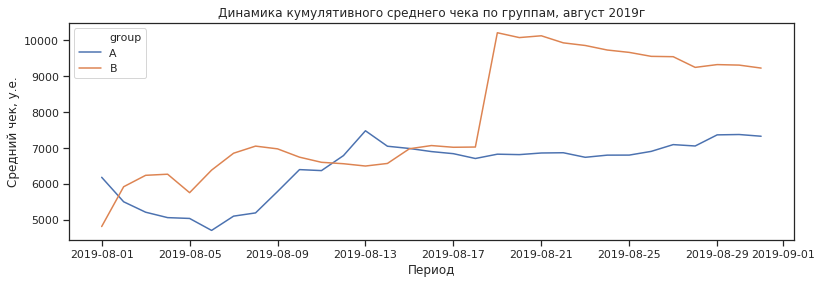

In [41]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=cumulativeData, x='date', y=cumulativeData['avg_check'], hue='group')
plt.title('Динамика кумулятивного среднего чека по группам, август 2019г')
plt.xlabel('Период')
plt.ylabel('Средний чек, у.е.')
plt.show()

Средний чек по группам увеличивался почти одинаково до середины теста, а после 17 августа средний чек группы B значительно превысил тот же показатель группы А. Причины скачка лежат также в пиковом заказе. К концу теста средний чек группы установился на уровне ~7тыс.у.е., а средний чек по группе В стал плавно снижаться после резкого скачка, в последние несколько дней теста был на уровне ~9,3тыс.у.е.

<a id='cum_avg_check_B_A'></a>
### 2.2.3 График относительного изменения кумулятивного среднего чека группы B к группе A

In [42]:
avg_checks_by_group = cumulativeData[cumulativeData['group'] == 'A'][['date', 'avg_check']].merge(cumulativeData[cumulativeData['group'] == 'B'][['date','avg_check']], on='date', suffixes=['A', 'B'])

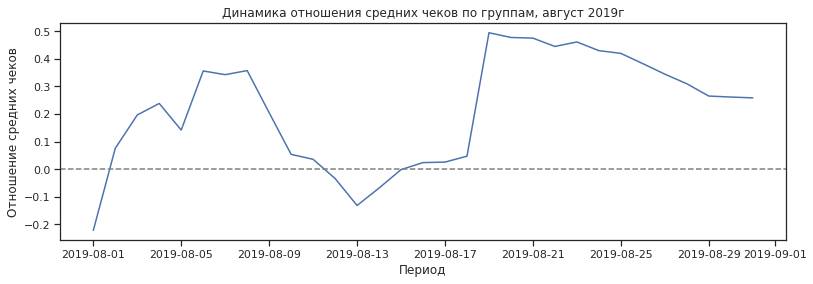

In [43]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=avg_checks_by_group, x='date', y=avg_checks_by_group['avg_checkB']/avg_checks_by_group['avg_checkA']-1)
plt.axhline(y=0, color='gray', linestyle='--') 
plt.title('Динамика отношения средних чеков по группам, август 2019г')
plt.xlabel('Период')
plt.ylabel('Отношение средних чеков')
plt.show()

В начале теста средний чек по группе А был выше, но уже через несколько дней средний чек по группе В стал уверенно превышать значения другой группы. В районе 13 августа было проседание, а затем после 17 августа мы опять видим резкий рост, когда случился пиковый заказ и далее к концу теста средний чек по группе В начал устанавливаться на отметке +30% к среднему чеку группы А.

<a id='cum_conversion'></a>
### 2.2.4 График кумулятивной конверсии по группам

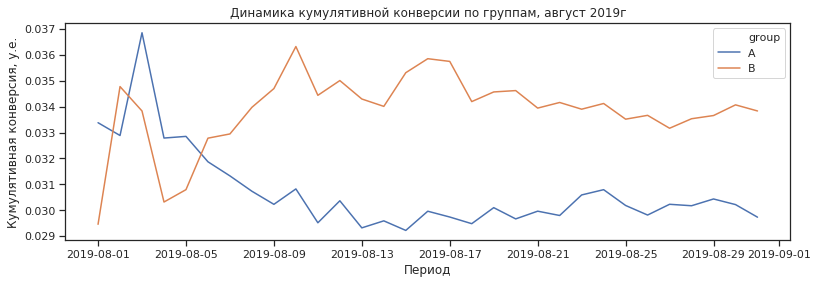

In [44]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=cumulativeData, x='date', y=cumulativeData['conversion'], hue='group')
plt.title('Динамика кумулятивной конверсии по группам, август 2019г')
plt.xlabel('Период')
plt.ylabel('Кумулятивная конверсия, у.е.')
plt.show()

Конверсия по группе В с 6 августа превысила конверсию группы А и после пиков 10го и 16го августа стала устанавливаться приблизительно на уровне 3,4%, но всё же видно ещё колебания на последние даты августа, поэтому говорить об установлении пока, скорее всего, преждевременно.

<a id='cum_conversion_B_A'></a>
### 2.2.5 График относительного изменения кумулятивной конверсии группы B к группе A

In [45]:
conversion_by_group = cumulativeData[cumulativeData['group'] == 'A'][['date', 'conversion']].merge(cumulativeData[cumulativeData['group'] == 'B'][['date','conversion']], on='date', suffixes=['A', 'B'])

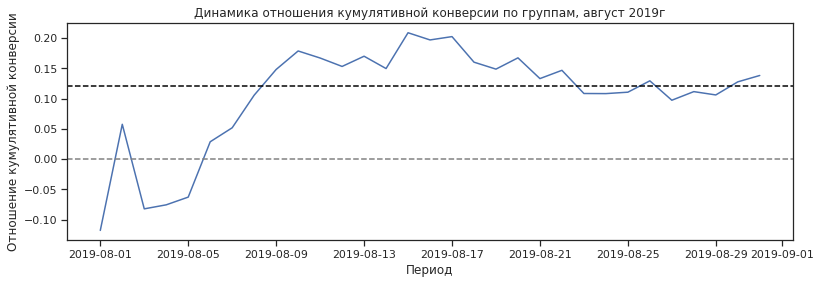

In [46]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=conversion_by_group, x='date', y=conversion_by_group['conversionB']/conversion_by_group['conversionA']-1)
plt.axhline(y=0, color='gray', linestyle='--') 
plt.axhline(y=0.12, color='black', linestyle='--')
plt.title('Динамика отношения кумулятивной конверсии по группам, август 2019г')
plt.xlabel('Период')
plt.ylabel('Отношение кумулятивной конверсии')
plt.show()

Начиная с 6 августа коверсия группы В начала превышать аналогичный показатель группы А, пиковые значения наблюдались в районе 10го и 16го августа, затем конверсия постепенно начала снижаться и после 21 августа начала устанавливаться приблизительно на уровне, на 12% превышающем конверсию группы А.

В целом отношение конверсии ещё в процессе установления. К тому же сперва стоит проанализировать аномалии, возможно, они изменят картину

<a id='scatter_orders_users'></a>
### 2.2.6 Точечный график количества заказов по пользователям

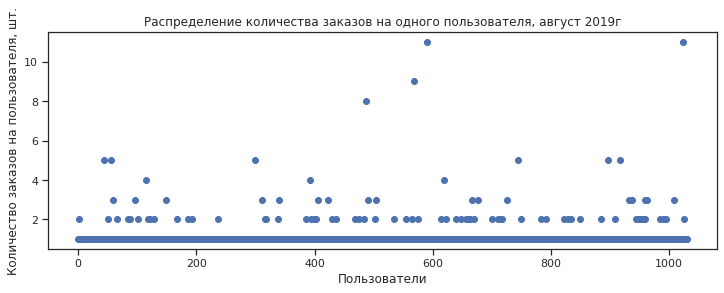

In [47]:
fig, ax = plt.subplots(figsize=(12,4))
plt.scatter(pd.Series(range(0,len(orders_by_users))), orders_by_users['count_orders']) 
plt.title('Распределение количества заказов на одного пользователя, август 2019г')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов на пользователя, шт.')
plt.show()

Основная масса пользователей совершает по 1 заказу, но также довольно много тех, кто делает 2 или 3 заказа. Посмотрим на персентили для определения границ аномального количества заказов на одного пользователя.

<a id='anomals_users'></a>
### 2.2.7 Границы для определения аномальных пользователей

In [48]:
print(np.percentile(orders_by_users['count_orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более 4 раз.
Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов (95 персентиль), и отсеим аномальных пользователей по ней.

In [49]:
usersWithManyOrders = orders_by_users[orders_by_users['count_orders'] > 2]['userId']

In [50]:
len(usersWithManyOrders)

30

<a id='scatter_orders'></a>
### 2.2.8 Точечный график стоимостей заказов

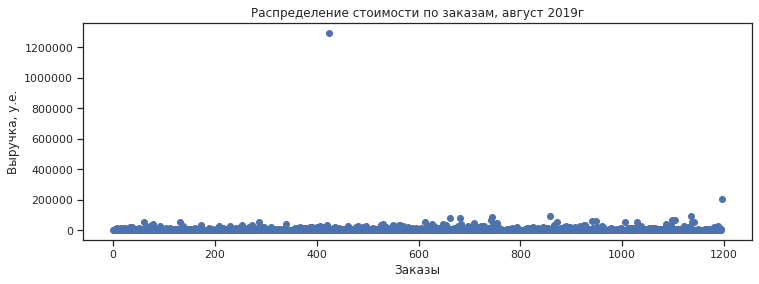

In [51]:
fig, ax = plt.subplots(figsize=(12,4))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue']) 
plt.title('Распределение стоимости по заказам, август 2019г')
plt.xlabel('Заказы')
plt.ylabel('Выручка, у.е.')
plt.show()

Видно, что основная масса заказов имеет стоимость до 100 тыс.у.е., есть один выброс на сумму более 1,2 млн.у.е.
Ограничим ось y, чтобы рассмотреть распределение стоимостей заказов без выбросов.

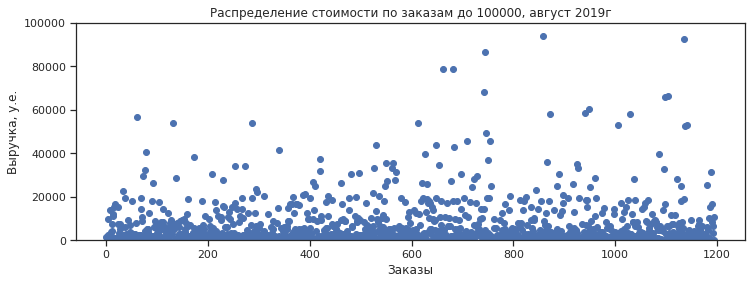

In [52]:
fig, ax = plt.subplots(figsize=(12,4))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue']) 
plt.ylim(0, 100000)
plt.title('Распределение стоимости по заказам до 100000, август 2019г')
plt.xlabel('Заказы')
plt.ylabel('Выручка, у.е.')
plt.show()

Основная масса заказов имеет стоимость чуть более 20 тыс.у.е. Более подробно посчитаем границу с помощью персентилей

<a id='anomals_orders'></a>
### 2.2.9 Границы для определения аномальных по стоимости заказов

In [53]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28000 у.е. и не более 1% дороже 58234 у.е. Выберем 28000 у.е. на одного пользователя за нижнюю границу выручки (95 персентиль), и отсеим аномальных пользователей по ней.

In [54]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [55]:
len(usersWithExpensiveOrders)

60

Выделим аномальных пользователей по двум критериям в отдельную таблицу.

In [56]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
len(abnormalUsers)

83

Всего 83 аномальных из 1031 пользователя (8%)

<a id='row_conversion'></a>
### 2.2.10 Статистическая значимость различий в конверсии между группами по «сырым» данным

In [57]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [58]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [59]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [60]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [61]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [62]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы и посчитаем, есть ли статистически значимые различия в конверсии между группами для стандартного уровня значимости на уровне 0,05 с помощью критерия Манна-Уитни. Выбираем именно этот критерий, т.к. мы видели, что в результатах присутствуют выбросы, а непараметрический тест основан на рангах и его результаты не подвержены влиянию имеющихся выбросов.


   Сформулируем односторонние гипотезы     
H0: конверсия группы В по сырым данным не отличается от конверсии группы А    
H1: конверсия группы В по сырым данным больше конверсии группы А

In [63]:
alpha = 0.05

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: превышение конверсии группы В по сырым данным статистически значимо')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в конверсии по сырым данным между группами нет'
    ) 

p-значение: 0.008
Отвергаем нулевую гипотезу: превышение конверсии группы В по сырым данным статистически значимо


In [64]:
print('Относительный выигрыш в конверсии группы B по сырым данным: {:.2%}'.format(sampleB.mean() / sampleA.mean() - 1))

Относительный выигрыш в конверсии группы B по сырым данным: 13.81%


<a id='row_avg_check'></a>
### 2.2.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы и посчитаем, есть ли статистически значимые различия в среднем чеке между группами для значимости на уровне 0,05 с помощью критерия Манна-Уитни.



   Сформулируем односторонние гипотезы     
H0: средние чеки группы В по сырым данным не отличаются от средних чеков группы А    
H1: средние чеки группы В по сырым данным больше средних чеков группы А

In [65]:
alpha = 0.05

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: превышение среднего чека по группе В по сырым данным статистически значимо')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке по сырым данным между группами нет'
    ) 

p-значение: 0.365
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке по сырым данным между группами нет


In [66]:
print('Относительный выигрыш в среднем чеке группы B по сырым данным: {:.2%}'.
      format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Относительный выигрыш в среднем чеке группы B по сырым данным: 25.87%


<a id='clean_conversion'></a>
### 2.2.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным

Подготовим выборки количества заказов по пользователям по группам теста

In [67]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [68]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Сформулируем гипотезы и посчитаем, есть ли статистически значимые различия в конверсии между группами для стандартного уровня значимости на уровне 0,05 по очищенным данным

  Сформулируем односторонние гипотезы     
H0: конверсия группы В по очищенным данным не отличается от конверсии группы А    
H1: конверсия группы В по очищенным данным больше конверсии группы А

In [69]:
alpha = 0.05

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: превышение конверсии группы В по очищенным данным статистически значимо')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в конверсии по очищенным данным между группами нет'
    ) 

p-значение: 0.006
Отвергаем нулевую гипотезу: превышение конверсии группы В по очищенным данным статистически значимо


In [70]:
print('Относительный выигрыш в конверсии группы B по очищенным данным: {:.2%}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Относительный выигрыш в конверсии группы B по очищенным данным: 17.57%


<a id='clean_avg_check'></a>
### 2.2.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы и посчитаем, есть ли статистически значимые различия в среднем чеке по очищенным данным между группами для значимости на уровне 0,05 с помощью критерия Манна-Уитни.


   Сформулируем односторонние гипотезы     
H0: средние чеки группы В по очищенным данным не отличаются от средних чеков группы А    
H1: средние чеки группы В по очищенным данным больше средних чеков группы А

In [71]:
alpha = 0.05

results = st.mannwhitneyu(orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'], 
                          orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'])

print('p-значение: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: превышение среднего чека по группе В по сырым данным статистически значимо')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке по очищенным данным  между группами нет'
    ) 

p-значение: 0.376
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке по очищенным данным  между группами нет


In [72]:
print('Относительный проигрыш в среднем чеке группы B по очищенным данным: {:.2%}'.
      format(orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean()/orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean()-1))

Относительный проигрыш в среднем чеке группы B по очищенным данным: -2.21%


<a id='analysis_conclusion'></a>
### Вывод по п. 2.2

Полученные результаты:

* Превышение конверсии в группе В над конверсией группы А и по сырым, и по очищенным данным статистически значима. Относительный выигрыш по очищенным данным почти на 4 процентных пункта выше, чем по сырым (17,6% против 13,8%)

* По очищенным данным статистически значимых различий в среднем чеке между группами нет (p-value увеличилось по сравнению с показателем по сырым данным), а относительный выигрыш в среднем чеке группы В сменился на относительный проигрыш в размере 2,21%, т.е. превышение в среднем чеке было вызвано наличием аномального заказа. 

 * График различия конверсии между группами сообщает, что результаты группы B почти с начала теста лучше группы A и нет значительной тенденции к ухудшению. После 21 августа различия конверсии начали устанавливаться приблизительно на уровне, на 12% превышающем конверсию группы А, но в целом отношение конверсии ещё в процессе установления.

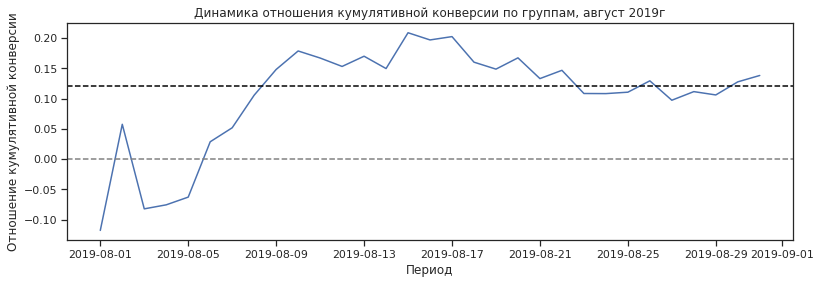

In [73]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=conversion_by_group, x='date', y=conversion_by_group['conversionB']/conversion_by_group['conversionA']-1)
plt.axhline(y=0, color='gray', linestyle='--') 
plt.axhline(y=0.12, color='black', linestyle='--')
plt.title('Динамика отношения кумулятивной конверсии по группам, август 2019г')
plt.xlabel('Период')
plt.ylabel('Отношение кумулятивной конверсии')
plt.show()

 * График различия среднего чека говорит о том, что результаты группы B начиная с середины теста лучше, но к концу теста заметна снижающаяся тенденция и средний чек по группе В начал устанавливаться на отметке +30% к среднему чеку группы А, но, возмножно, об установлении отношения говорить еще рано. 

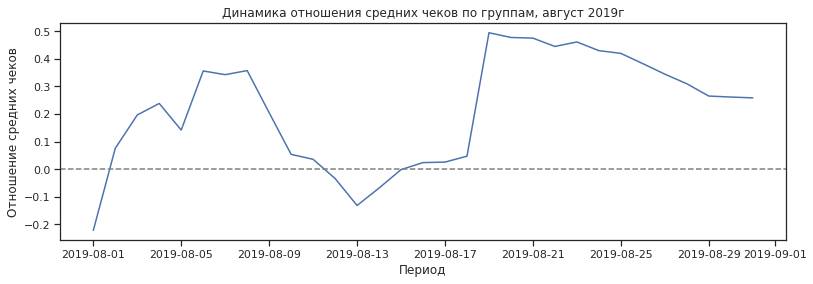

In [74]:
fig, ax = plt.subplots(figsize=(13,4))
sns.lineplot(data=avg_checks_by_group, x='date', y=avg_checks_by_group['avg_checkB']/avg_checks_by_group['avg_checkA']-1)
plt.axhline(y=0, color='gray', linestyle='--') 
plt.title('Динамика отношения средних чеков по группам, август 2019г')
plt.xlabel('Период')
plt.ylabel('Отношение средних чеков')
plt.show()

<a id='total_conclusion'></a>
## Общий вывод

Согласно определенным в начале целям были проанализрованы результаты A/B-теста, рассмотрим выводы и сформулируем предложения для увеличения выручки интернет-магазина.
Исходя из обнаруженных результатов теста видно, что **группа В показывает лучшие результаты к концу теста** (и по кумулятивной конверсии, и по величине среднего чека). Превышение конверсии в группе В над конверсией группы А статистически подверждена на 5% уровне значимости, выигрыш группы В по данному показателю 13,8% для очищенных данных. А вот разница в среднем чеке статистически не подверждена также с 5% уровнем значимости и по очищенным данным мы наблюдаем относительный проигрыш в среднем чеке на уровне 2,21%.
Поэтому учитывая эти факты, могут быть **две рекомендации в зависимости от целевых показателей**, определяемых для результатов теста:
- если важна только увеличивающаяся конверсия, то можем останавливать тест и признавать его успешным
- если же важен и размер среднего чека (что несомненно важно для целей увеличения выручки), то тогда неободимо продолжить тест до установления отношения средних чеков по группам и подвтерждения с помощью статистических тестов значимости в превышении среднего чека группы В над средним чеком группы А.
